# Beberapa Contoh Penerapan Particle Swarm Optimization

1. Menggunakan bahasa pemrograman python
2. Menggunakan library **PySwarms**

**PySwarms**: Python library untuk particle swarm optimization (PSO) [https://pyswarms.readthedocs.io/en/latest/](https://pyswarms.readthedocs.io/en/latest/)

![](img/img7.png)

- Cara install library **PySwarms**:

    `pip install pyswarms`

## Bagaimana cara menggunakan **PySwarms**?

1. Persiapkan parameter `cost function`
2. Persiapkan parameter lainnya
3. Import `pyswarms`
4. Membuat *instance* dari `pyswarms.backend` *class*
5. Jalankan PSO
6. Plot hasilnya
7. Tampilkan solusi terbaik

## Contoh 1 - Fungsi Minimum

1. Contoh penggunaan PySwarms dalam optimalisasi.
2. Mengoptimalkan persamaan

$$ f(x_1, x_2) = 3x_1^2 - 2x_1x_2 + 3x_2^2 - x_1 - x_2 - 3$$

3. Berapa nilai $x_1$ dan $x_2$ sehingga $y$ atau $f(x_1, x_2)$ paling minimum
4. Kita coba tampilkan `loss surface`-nya

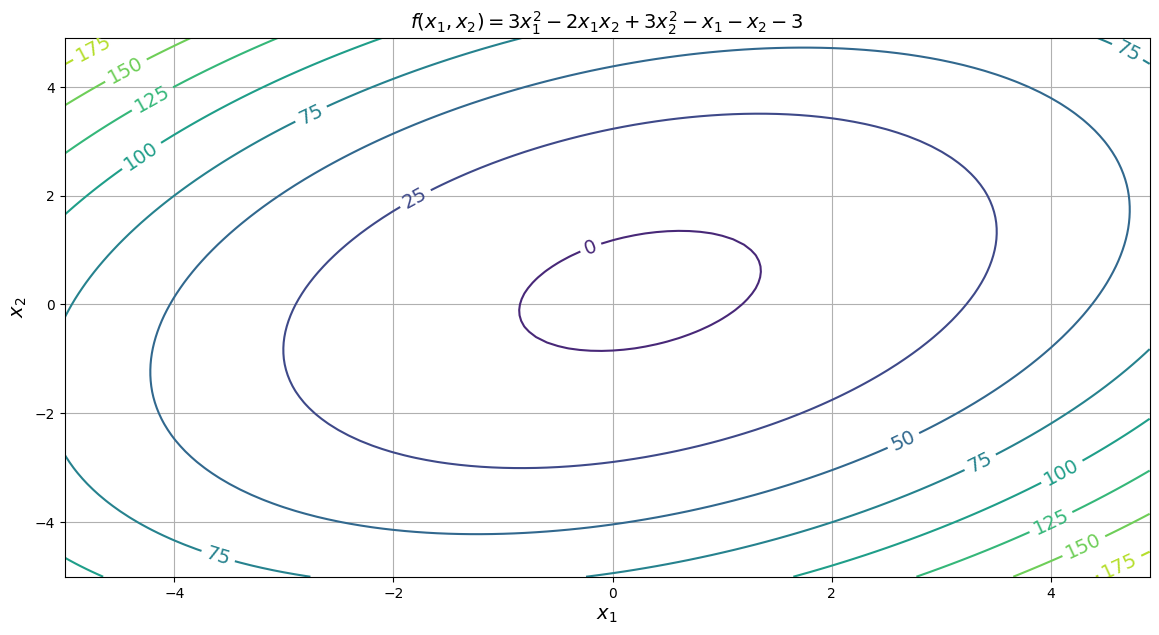

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

def pers1(X,Y):
    return 3*X**2 - 2*X*Y + 3*Y**2 - X - Y - 3

x = np.vstack((np.array([np.arange(-5,5,0.1)]),
               np.array([np.arange(-5,5,0.1)])))

X,Y = np.meshgrid(x[0], x[1])
Z = pers1(X,Y)
fig, ax = plt.subplots(figsize=(14, 7))
CS = ax.contour(X, Y, Z)
ax.clabel(CS, inline=True, fontsize=14)
ax.set_title('$ f(x_1, x_2) = 3x_1^2 - 2x_1x_2 + 3x_2^2 - x_1 - x_2 - 3$', fontsize=14)
ax.set_xlabel('$x_1$', fontsize=14)
ax.set_ylabel('$x_2$', fontsize=14)
ax.grid()

### Persiapkan parameter *cost function*

- Persiapkan parameter *cost function*
- Gunakan persamaan $$ f(x_1, x_2) = 3x_1^2 - 2x_1x_2 + 3x_2^2 - x_1 - x_2 - 3$$
- Berapa nilai $x_1$ dan $x_2$ sehingga $y$ atau $f(x_1, x_2)$ paling minimum?
- Berbeda dengan *PyGad* yang mencari nilai fitness tertinggi, *PySwarms* akan mencari nilai cost terendah

In [2]:
def pers1(X,Y):
    return 3*X**2 - 2*X*Y + 3*Y**2 - X - Y - 3

def calculate_cost(x):
    cost = pers1(x[:,0],x[:,1])

    return cost

### Persiapkan parameter lainnya

- Misalkan kita menggunakan topologi star, maka kita import topologi `Star` dari `pyswarms.backend.topology`
- Karena jumlah variabel yang dicari ada 2, yaitu $x_1$ dan $x_2$, maka parameter dari posisi partikel `dimensions = 2`
- `n_particles` adalah jumlah partikel yang dipakai
- Parameter lainnya dapat dilihat di website `PySwarms`: [https://pyswarms.readthedocs.io/en/latest/dev.api.html](https://pyswarms.readthedocs.io/en/latest/dev.api.html)

In [3]:
from pyswarms.backend.topology import Star

topology = Star()
dimensions = 2
options = {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
n_particles = 10
max_iter = 20

### Membuat *instance* dari `pyswarms.backend`

In [4]:
import pyswarms

pso_instance1 = pyswarms.backend.create_swarm(
    dimensions = dimensions,
    n_particles = n_particles,
    options = options
)

### Jalankan PSO

In [5]:
total_cost = []

for i in range(max_iter):
    pso_instance1.current_cost = calculate_cost(pso_instance1.position)
    pso_instance1.pbest_cost = calculate_cost(pso_instance1.pbest_pos)
    pso_instance1.pbest_pos, pso_instance1.pbest_cost = pyswarms.backend.compute_pbest(pso_instance1)

    if np.min(pso_instance1.pbest_cost) < pso_instance1.best_cost:
        pso_instance1.best_pos, pso_instance1.best_cost = topology.compute_gbest(pso_instance1)

    print("Iterasi ke-{}. \t Nilai cost terbaik: {:.2f}".format(i+1, pso_instance1.best_cost))
    print("dari partikel pada posisi {}\n".format(pso_instance1.best_pos))

    pso_instance1.velocity = topology.compute_velocity(pso_instance1)
    pso_instance1.position = topology.compute_position(pso_instance1)

    total_cost = np.append(total_cost, pso_instance1.best_cost)

Iterasi ke-1. 	 Nilai cost terbaik: -3.23
dari partikel pada posisi [0.18182497 0.18340451]

Iterasi ke-2. 	 Nilai cost terbaik: -3.23
dari partikel pada posisi [0.18182497 0.18340451]

Iterasi ke-3. 	 Nilai cost terbaik: -3.23
dari partikel pada posisi [0.18182497 0.18340451]

Iterasi ke-4. 	 Nilai cost terbaik: -3.23
dari partikel pada posisi [0.18182497 0.18340451]

Iterasi ke-5. 	 Nilai cost terbaik: -3.23
dari partikel pada posisi [0.27026224 0.3284153 ]

Iterasi ke-6. 	 Nilai cost terbaik: -3.23
dari partikel pada posisi [0.27026224 0.3284153 ]

Iterasi ke-7. 	 Nilai cost terbaik: -3.23
dari partikel pada posisi [0.27026224 0.3284153 ]

Iterasi ke-8. 	 Nilai cost terbaik: -3.23
dari partikel pada posisi [0.27026224 0.3284153 ]

Iterasi ke-9. 	 Nilai cost terbaik: -3.24
dari partikel pada posisi [0.26161347 0.19170431]

Iterasi ke-10. 	 Nilai cost terbaik: -3.24
dari partikel pada posisi [0.26161347 0.19170431]

Iterasi ke-11. 	 Nilai cost terbaik: -3.24
dari partikel pada posisi 

### Plot hasilnya

Text(0.5, 1.0, 'Iterasi vs. Cost')

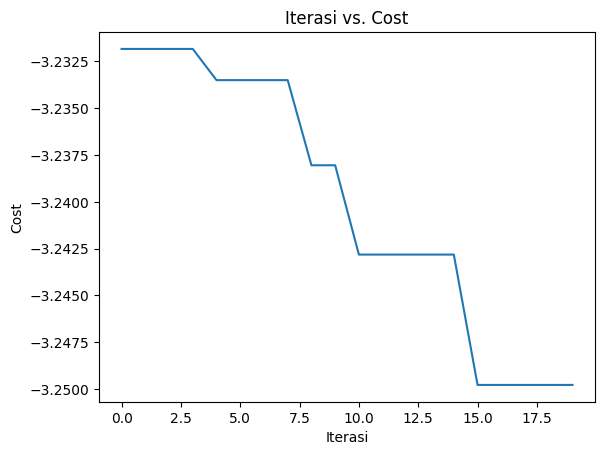

In [6]:
ax = plt.subplot()
ax.plot(total_cost)
ax.set_xlabel('Iterasi')
ax.set_ylabel('Cost')
ax.set_title('Iterasi vs. Cost')

### Tampilkan solusi terbaik

In [7]:
print("Posisi terbaik sebagai solusi [x1, x2] = ", pso_instance1.best_pos)
print("Cost terbaik = ", pso_instance1.best_cost)

Posisi terbaik sebagai solusi [x1, x2] =  [0.24285661 0.25297478]
Cost terbaik =  -3.249777868045839


## Contoh 2 - Travelling Salesman Problem

1. Mencari rute terbaik
2. Mengunjungi semua kedai kopi janji jiwa
3. Mulai dari ITK, kembali ke ITK

![](img/img2.png)

### Persiapkan parameter `fitness_func`

- Kita gunakan data sebagaimana yang digunakan pada GA

In [8]:
import pandas as pd

data = pd.read_csv('data_janji_jiwa.csv')
data

,JARAK (KM),ITK,INDRAKILA,GRAND CITY,MT. HARYONO,RUHUI RAHAYU,AHMAD YANI
0,ITK,0.0,12.1,12.4,14.7,16.4,20.5
1,INDRAKILA,12.1,0.0,3.3,3.7,5.4,6.2
2,GRAND CITY,12.4,3.3,0.0,2.6,4.3,9.0
3,MT. HARYONO,14.7,3.7,2.6,0.0,1.7,6.8
4,RUHUI RAHAYU,16.4,5.4,4.3,1.8,0.0,7.9
5,AHMAD YANI,20.5,6.2,9.0,6.8,7.9,0.0


In [9]:
# Fungsi merubah posisi partikel menjadi rute
def pos2route(x):

    row, col = x.shape

    for r in range(row):
        x_sorted = np.sort(x[r,:])

        x_new = np.zeros(x_sorted.shape)
        for c in range(col):
            x_new += x[r,:]/x[r,:]*(x[r,:] == x_sorted[c])*(c+1)
        
        x[r,:] = x_new

    return np.int_(x)

# Fungsi menghitung jarak berdasarkan rute
def cal_distance(route):
    distance = 0

    for i in range(len(route)):
        if i == 0:
            distance += data.iloc[0, route[i]+1]
        elif i == len(route)-1:
            distance += data.iloc[route[i-1], route[i]+1] + data.iloc[route[i], 1]
        else:
            distance += data.iloc[route[i-1], route[i]+1]

    return distance


# cost function
def cal_cost(x):
    
    x = pos2route(x)

    row, col = x.shape
    output = np.zeros(row)
    
    for r in range(row):
        output[r] = cal_distance(x[r,:])

    return output

### Persiapkan parameter lainnya

- Kita gunakan parameter yang sama seperti contoh 1

In [10]:
from pyswarms.backend.topology import Star

topology = Star()
dimensions = 5
options = {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
n_particles = 10
max_iter = 20

### Membuat *instance* dari `pyswarms.backend`

In [11]:
import pyswarms

pso_instance2 = pyswarms.backend.create_swarm(
    dimensions = dimensions,
    n_particles = n_particles,
    options = options
)

### Jalankan PSO

In [12]:
total_cost = []

for i in range(max_iter):
    pso_instance2.current_cost = cal_cost(pso_instance2.position)
    pso_instance2.pbest_cost = cal_cost(pso_instance2.pbest_pos)
    pso_instance2.pbest_pos, pso_instance2.pbest_cost = pyswarms.backend.compute_pbest(pso_instance2)

    if np.min(pso_instance2.pbest_cost) < pso_instance2.best_cost:
        pso_instance2.best_pos, pso_instance2.best_cost = topology.compute_gbest(pso_instance2)

    print("Iterasi ke-{}. \t Nilai cost terbaik: {:.2f}".format(i+1, pso_instance2.best_cost))
    print("dari partikel pada posisi {}\n".format(pso_instance2.best_pos))

    pso_instance2.velocity = topology.compute_velocity(pso_instance2)
    pso_instance2.position = topology.compute_position(pso_instance2)

    total_cost = np.append(total_cost, pso_instance2.best_cost)

Iterasi ke-1. 	 Nilai cost terbaik: 46.80
dari partikel pada posisi [2. 1. 5. 3. 4.]

Iterasi ke-2. 	 Nilai cost terbaik: 46.80
dari partikel pada posisi [2. 1. 5. 3. 4.]

Iterasi ke-3. 	 Nilai cost terbaik: 46.80
dari partikel pada posisi [2. 1. 5. 3. 4.]

Iterasi ke-4. 	 Nilai cost terbaik: 46.30
dari partikel pada posisi [2. 1. 5. 4. 3.]

Iterasi ke-5. 	 Nilai cost terbaik: 46.30
dari partikel pada posisi [2. 1. 5. 4. 3.]

Iterasi ke-6. 	 Nilai cost terbaik: 46.30
dari partikel pada posisi [2. 1. 5. 4. 3.]

Iterasi ke-7. 	 Nilai cost terbaik: 46.30
dari partikel pada posisi [2. 1. 5. 4. 3.]

Iterasi ke-8. 	 Nilai cost terbaik: 46.30
dari partikel pada posisi [2. 1. 5. 4. 3.]

Iterasi ke-9. 	 Nilai cost terbaik: 46.30
dari partikel pada posisi [2. 1. 5. 4. 3.]

Iterasi ke-10. 	 Nilai cost terbaik: 42.90
dari partikel pada posisi [2. 3. 4. 5. 1.]

Iterasi ke-11. 	 Nilai cost terbaik: 42.90
dari partikel pada posisi [2. 3. 4. 5. 1.]

Iterasi ke-12. 	 Nilai cost terbaik: 42.90
dari part

### Plot hasilnya

Text(0.5, 1.0, 'Iterasi vs. Cost')

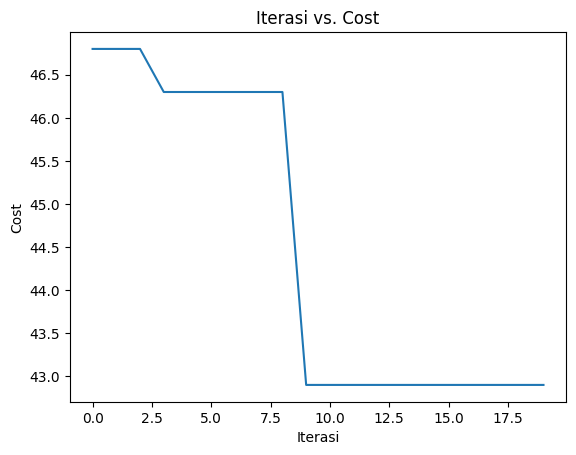

In [13]:
ax = plt.subplot()
ax.plot(total_cost)
ax.set_xlabel('Iterasi')
ax.set_ylabel('Cost')
ax.set_title('Iterasi vs. Cost')

### Tampilkan solusi terbaik

In [14]:
print("Posisi terbaik sebagai solusi [x1, x2] = ", pso_instance2.best_pos)
print("Cost terbaik = ", pso_instance2.best_cost)

Posisi terbaik sebagai solusi [x1, x2] =  [2. 3. 4. 5. 1.]
Cost terbaik =  42.900000000000006


In [15]:
len(pso_instance2.best_pos)

5

In [16]:
rute_terbaik = data.iloc[0,0]
for i in range(len(pso_instance2.best_pos)):
    rute_terbaik += ' -> ' + data.iloc[np.int_(pso_instance2.best_pos[i]),0]

rute_terbaik += " -> " + data.iloc[0,0]

print("Rute ngopi terbaik adalah:\n'{}'\ndengan total jarak tempuh {:.2f} km".format(rute_terbaik, pso_instance2.best_cost))

Rute ngopi terbaik adalah:
'ITK -> GRAND CITY -> MT. HARYONO -> RUHUI RAHAYU -> AHMAD YANI -> INDRAKILA -> ITK'
dengan total jarak tempuh 42.90 km
